# Lets Create Some Random Graphs

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

SyntaxError: invalid syntax (<ipython-input-76-d82b018fd2c7>, line 7)

In [135]:
'''
Idea: generar un grafo completo. Recorrerlo usando DFS desde un nodo elegido al azar.
Para cada arista que no sea puente, tomar una muestra de una variable aleatoria y eliminar
la arista si la variable supera cierto umbral. A grandes rasgos, el procedimiento consiste
en eliminar cierto porcentaje esperado de backedges.
'''

def sacarBackedges(n, grafo, p_backedge=0.5):
    # Elimina cada backedge de un grafo con una probabilidad 1.0 - p_backedge.
    vecinosYPesos = [ [] for i in range(n) ]

    for e in grafo:
        vecinosYPesos[e[0] - 1].append([ e[1], e[2] ])
        vecinosYPesos[e[1] - 1].append([ e[0], e[2] ])

    color = dict([ (i+1, "blanco") for i in range(n) ])
    backedges = backedgesDFS(vecinosYPesos, color, 1, -1, [])

    for b in backedges:
        p = np.random.uniform()
        if p >= p_backedge:
            grafo.remove(b)
    

def backedgesDFS(vecinosYPesos, color, v, padre, res):
    color[v] = "gris"

    for t in vecinosYPesos[v-1]:
        w = t[0]
        if color[w] == "blanco":
            backedgesDFS(vecinosYPesos, color, w, v, res)
        if color[w] == "gris" and w != v and w != padre:
            l, r = min(v,w), max(v,w)
            res.append([l, r, t[1]])

    color[v] = "negro"

    return res

def generarGrafoSpidermanPesosUniformes(n, l, minimo=0, maximo=10, p_backedge=0.5):
    # n = número de rayos
    # l = número de capas

    grafoSpiderman = []

    # inicializa la primera capa
    for j in range(2, n+2):
        grafoSpiderman.append( [1, j, np.random.randint(minimo, maximo)] )

        if j < n+1:
            grafoSpiderman.append( [j, j+1, np.random.randint(minimo, maximo)] )
        else:
            grafoSpiderman.append( [2, j, np.random.randint(minimo, maximo)] )

    # genera las capas 2 a l
    for i in range(1, l):
        for j in range(2, n+2):
            grafoSpiderman.append( [j + (i-1)*n, j + i*n, np.random.randint(minimo, maximo)] )

            if j < n+1:
                grafoSpiderman.append( [j + i*n, j + i*n + 1, np.random.randint(minimo, maximo)] )
            else:
                grafoSpiderman.append( [2 + i*n, j + i*n, np.random.randint(minimo, maximo)] )

    sacarBackedges(n*l + 1, grafoSpiderman, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafoSpiderman ]

    return grafoStr

def generarGrafoSpidermanPesosNormales(n, l, mu=5, sigma=1, p_backedge=0.5):
    # n = número de rayos
    # l = número de capas

    grafoSpiderman = []

    # inicializa la primera capa
    for j in range(2, n+2):
        grafoSpiderman.append( [1, j, int(max(np.random.normal(mu, sigma), 0))] )

        if j < n+1:
            grafoSpiderman.append( [j, j+1, int(max(np.random.normal(mu, sigma), 0))] )
        else:
            grafoSpiderman.append( [2, j, int(max(np.random.normal(mu, sigma), 0))] )

    # genera las capas 2 a l
    for i in range(1, l):
        for j in range(2, n+2):
            grafoSpiderman.append( [j + (i-1)*n, j + i*n, int(max(np.random.normal(mu, sigma), 0))] )

            if j < n+1:
                grafoSpiderman.append( [j + i*n, j + i*n + 1, int(max(np.random.normal(mu, sigma), 0))] )
            else:
                grafoSpiderman.append( [2 + i*n, j + i*n, int(max(np.random.normal(mu, sigma), 0))] )

    print(grafoSpiderman)
    sacarBackedges(n*l + 1, grafoSpiderman, p_backedge)
    print(grafoSpiderman)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafoSpiderman ]

    return grafoStr

def generarGrafoAleatorioPesosUniformes(n, minimo=0, maximo=10, p_backedge=0.5):
    # Genera un grafo completo representado por una lista de aristas.
    # El nodo de menor índice aparece antes, pero los pares no son ordenados
    # (es decir, el grafo no es dirigido).
    grafo = []
    pesoActual = 0
    for i in range(1, n):
        for j in range(i+1, n+1):
            grafo.append( [i, j, np.random.randint(minimo, maximo)] )
            pesoActual += 1

    sacarBackedges(n, grafo, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafo ]

    return grafoStr

def generarGrafoAleatorioPesosNormales(n, mu=5, sigma=1, p_backedge=0.5):
    # Es necesario que los pesos se correspondan con la cantidad de aristas
    # de un grafo completo de n nodos
#     assert(len(pesos) == n*(n-1) / 2)

    # Genera un grafo completo representado por una lista de aristas.
    # El nodo de menor índice aparece antes, pero los pares no son ordenados
    # (es decir, el grafo no es dirigido).
    grafo = []
    pesoActual = 0
    for i in range(1, n):
        for j in range(i+1, n+1):
            grafo.append( [i, j, int(max(np.random.normal(mu, sigma), 0))] )
            pesoActual += 1

    sacarBackedges(n, grafo, p_backedge)

    grafoStr = [ " ".join( str(k) for k in e ) for e in grafo ]

    return grafoStr

def generarEntradaPesosUniformes(n, minimo=0, maximo=10, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(200):
                grafo = generarGrafoAleatorioPesosUniformes(k, minimo, maximo, p_backedge)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

def generarEntradaPesosNormales(n, mu=5, sigma=1, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(200):
                grafo = generarGrafoAleatorioPesosNormales(k, mu, sigma, p_backedge)
                entrada.write(str(k) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")
        
def generarEntradaSpidermanPesosUniformes(n, l, minimo=0, maximo=10, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(200):
                grafo = generarGrafoSpidermanPesosUniformes(k, l, minimo, maximo, p_backedge)
                entrada.write(str(k*l+1) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")

def generarEntradaSpidermanPesosNormales(n, l, mu=5, sigma=1, p_backedge=0.5, archivo="output"):
    # Genera un caso de test con 50 grafos de 5 a n nodos. Los pesos están distribuidos
    # uniformemente según los parámetros especificados.
    with open(archivo, 'w') as entrada:
        for k in range(5,n+1):
            for i in range(200):
                grafo = generarGrafoSpidermanPesosNormales(k, l, mu, sigma, p_backedge)
                entrada.write(str(k*l+1) + " " + str(len(grafo)) + '\n')
                for j in grafo:
                    entrada.write(j + '\n')
        entrada.write("0 0\n")
        
# def generarGrafo(n, pesos, p_backedge=0.5):
#     # Es necesario que los pesos se correspondan con la cantidad de aristas
#     # de un grafo completo de n nodos

#     # Genera un grafo completo representado por una lista de aristas.
#     # El nodo de menor índice aparece antes, pero los pares no son ordenados
#     # (es decir, el grafo no es dirigido).
#     grafoCompleto = []
#     pesoActual = 0
#     for i in range(1, n):
#         for j in range(i+1, n+1):
#             grafoCompleto.append( [i, j, pesos[pesoActual]] )
#             pesoActual += 1

#     return [ " ".join( str(k) for k in e ) for e in grafoCompleto ]

In [137]:
generarEntradaSpidermanPesosUniformes(40, 5, 1, 30, 0.5, "./tests/spiderman_uniforme_10nodos_1a30.test-in")

# Corremos el experimento

In [127]:
! make expe

In [128]:
dfSpidermanUniforme = pd.read_csv("./experimentacion/spiderman_uniforme_10nodos_1a30.stderr", delimiter=";")

In [129]:
dfNormal.head()
dfSpidermanUniforme

,Cantidad de Nodos,Cantidad de Ejes,Tiempo generando Mst,Tiempo calculando raiz
0,26,38,0.000040,0.000025
1,26,38,0.000044,0.000025
2,26,41,0.000042,0.000024
3,26,35,0.000035,0.000018
4,26,38,0.000039,0.000021
5,26,40,0.000034,0.000019
6,26,39,0.000039,0.000022
7,26,39,0.000041,0.000020
8,26,38,0.000035,0.000019
9,26,40,0.000034,0.000019


In [130]:
dfNormal = dfNormal.groupby("Cantidad de Nodos").mean()
dfUniforme = dfUniforme.groupby("Cantidad de Nodos").mean()
dfSpidermanUniforme = dfSpidermanUniforme.groupby("Cantidad de Nodos").mean()

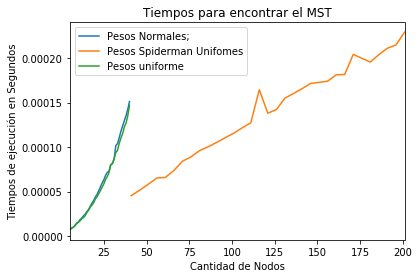

In [132]:
df4 = pd.DataFrame({'Pesos uniforme': dfUniforme['Tiempo generando Mst'],
                    'Pesos Normales;': dfNormal['Tiempo generando Mst'],
                   'Pesos Spiderman Unifomes' :dfSpidermanUniforme['Tiempo generando Mst'] })
ax = df4.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
plt.title("Tiempos para encontrar el MST")
plt.show()

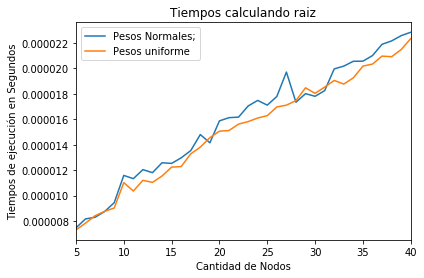

In [118]:
df4 = pd.DataFrame({'Pesos uniforme': dfUniforme['Tiempo calculando raiz'],'Pesos Normales;': dfNormal['Tiempo calculando raiz']})
ax = df4.plot(logy=False)
ax.set_ylabel("Tiempos de ejecución en Segundos")
plt.title("Tiempos calculando raiz")
plt.show()

In [119]:
dfComp = pd.DataFrame()
dfComp['Cantidad de Nodos'] = dfNormal.index.values
dfComp['Complejidad n**2'] = [100 + random.normalvariate(n**2,50) for n in dfNormal.index.values]
dfComp['Tiempo en segundos'] = dfNormal['Tiempo generando Mst']

plt.clf()
correlation = dfComp.corr()
correlation

,Cantidad de Nodos,Complejidad n**2,Tiempo en segundos
Cantidad de Nodos,1.000000,0.973234,0.981340
Complejidad n**2,0.973234,1.000000,0.992509
Tiempo en segundos,0.981340,0.992509,1.000000


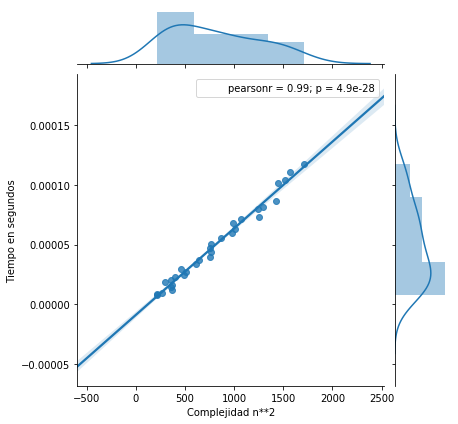

In [120]:
sns.jointplot(dfComp['Complejidad n**2'], dfComp['Tiempo en segundos'], kind="reg")
plt.show()

In [121]:
dfCompRoot = pd.DataFrame()
dfCompRoot['Cantidad de Nodos'] = dfNormal.index.values
dfCompRoot['Complejidad n'] = [100 + random.normalvariate(n,1) for n in dfNormal.index.values]
dfCompRoot['Tiempo en segundos'] = dfNormal['Tiempo calculando raiz']

plt.clf()
correlation = dfCompRoot.corr()
correlation

,Cantidad de Nodos,Complejidad n,Tiempo en segundos
Cantidad de Nodos,1.000000,0.996049,0.979885
Complejidad n,0.996049,1.000000,0.973161
Tiempo en segundos,0.979885,0.973161,1.000000


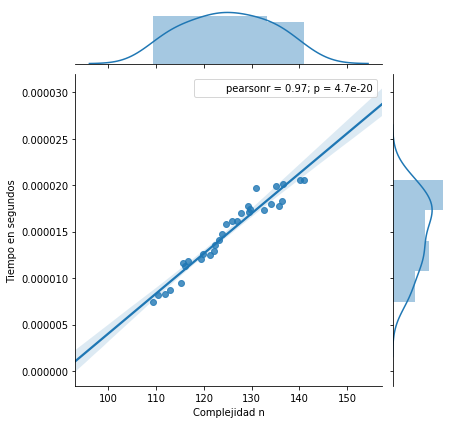

In [122]:
sns.jointplot(dfCompRoot['Complejidad n'], dfCompRoot['Tiempo en segundos'], kind="reg")
plt.show()